## Module 1: Image Enhancement (Handled by Student 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
from skimage import io, color, img_as_float, img_as_ubyte, exposure, filters
from scipy.ndimage import convolve

### 1. Histogram Processing

##### Histogram Equalization

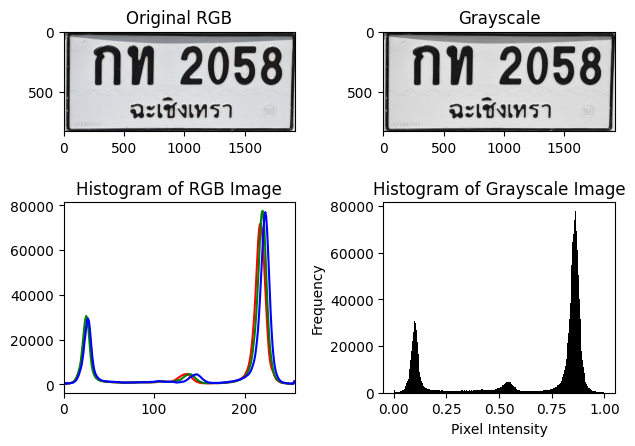

In [2]:
# อ่านภาพในโหมดสี (Color)
img = cv2.imread('License_plate_003.jpg')
# img_color = io.imread('s-l1600.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # เปลี่ยนจาก BGR เป็น RGB

# แปลงจาก RGB เป็นสีเทา (Grayscale)
img_gray = color.rgb2gray(img_rgb)

# แสดงผลลัพธ์ภาพ
plt.subplot(2, 2, 1), plt.imshow(img_rgb), plt.title('Original RGB')
plt.subplot(2, 2, 2), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale')

# สร้างและแสดง Histogram ของภาพต้นฉบับ (RGB)
plt.subplot(2, 2, 3)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram of RGB Image')

# สร้างและแสดง Histogram ของภาพสีเทา
plt.subplot(2, 2, 4)
plt.hist(img_gray.ravel(), bins=256, range=[0, 1], color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

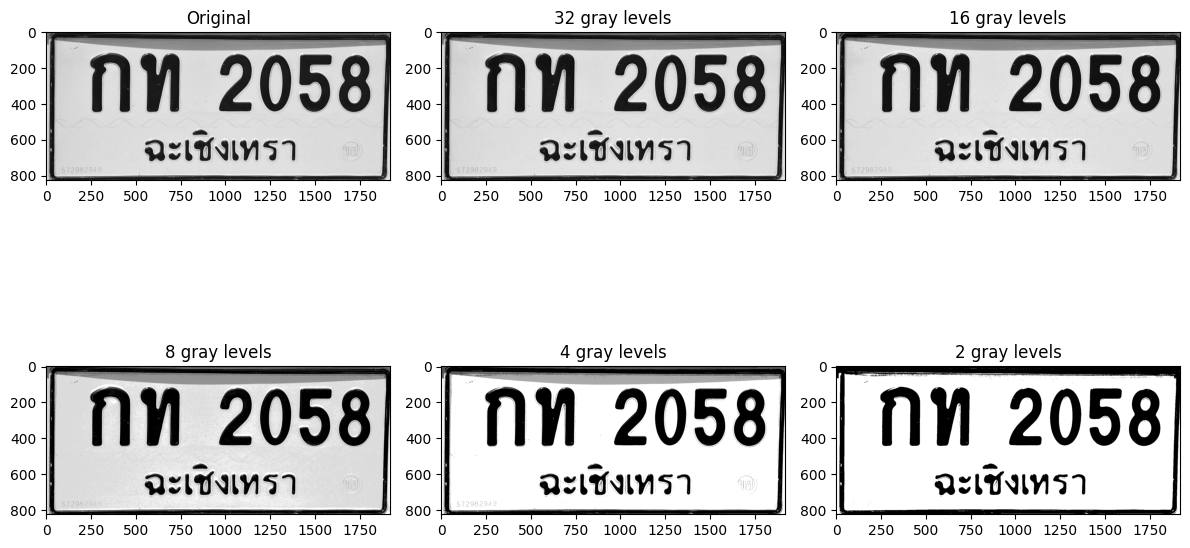

In [3]:
# Load image
v, h = img_gray.shape

# Create a figure
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original')

# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantized images
gray_levels = [32, 16, 8, 4, 2]
titles = ['32 gray levels', '16 gray levels', '8 gray levels', '4 gray levels', '2 gray levels']

for i, levels in enumerate(gray_levels):
    buf = quantize_image(img_gray, levels)
    row, col = divmod(i + 1, 3)  # Adjusting column and row indices correctly
    axs[row, col].imshow(buf, cmap='gray')
    axs[row, col].set_title(titles[i])

# Adjust layout and display the images
plt.tight_layout()
plt.show()

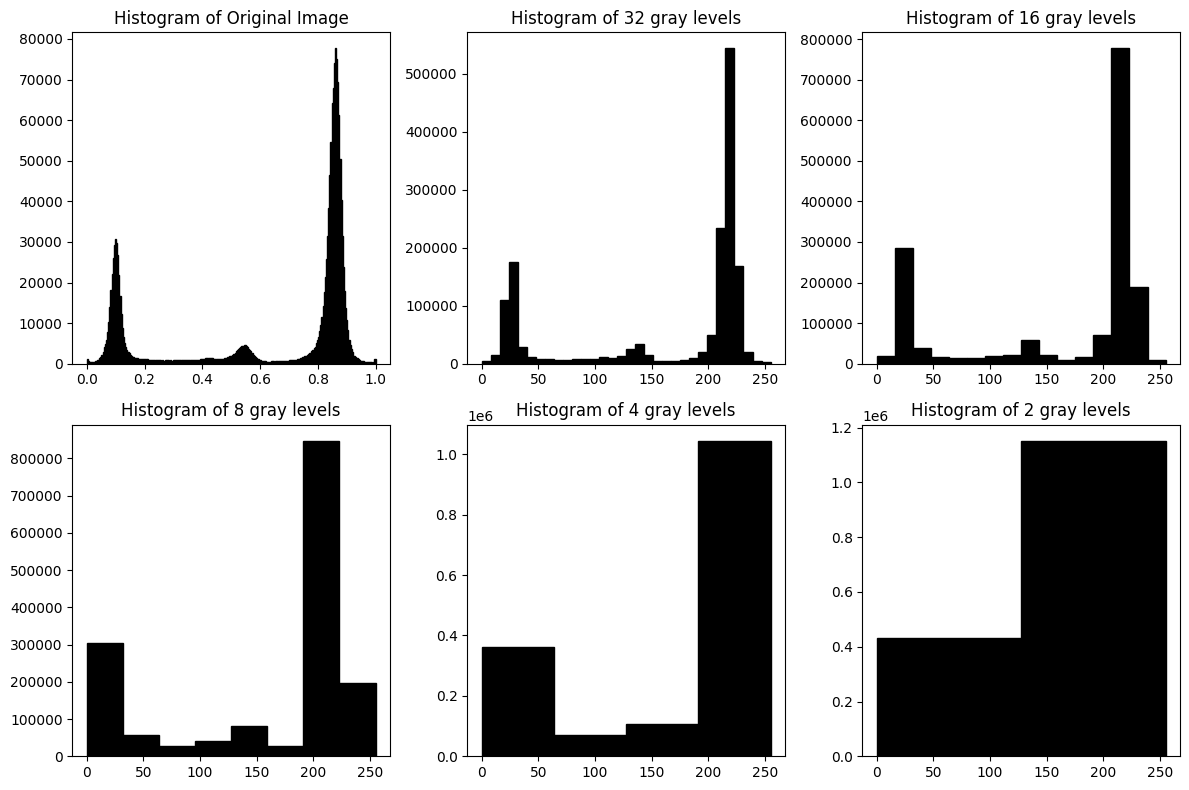

In [4]:
# Load image
v, h = img_gray.shape

# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantized images
gray_levels = [32, 16, 8, 4, 2]
titles = ['32 gray levels', '16 gray levels', '8 gray levels', '4 gray levels', '2 gray levels']

# Create a figure for the histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Original image histogram
axs[0, 0].hist(img_gray.ravel(), bins=256, range=(0.0, 1.0), fc='black', ec='black')
axs[0, 0].set_title('Histogram of Original Image')

# Histograms for quantized images
for i, levels in enumerate(gray_levels):
    buf = quantize_image(img_gray, levels)
    row, col = divmod(i + 1, 3)  # Adjusting row and column indices correctly
    axs[row, col].hist(buf.ravel(), bins=levels, range=(0.0, 255), fc='black', ec='black')
    axs[row, col].set_title(f'Histogram of {titles[i]}')

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()

### SAVE IMG

In [5]:
# Function to quantize image
def quantize_image(img, levels):
    step = 256 / levels
    buf = np.zeros_like(img)
    for ic in range(levels):
        indices = np.where((step * ic) <= img * 255)
        buf[indices] = ic
    return img_as_ubyte(buf / (levels - 1))

# Quantize the image to 4 gray levels
buf_4_gray = quantize_image(img_gray, 4)
buf_16_gray = quantize_image(img_gray, 16)

# Save the image
io.imsave('License_plate_16_gray_levels.jpg', buf_16_gray)

### Histogram Equalization Histogram equalization enhances

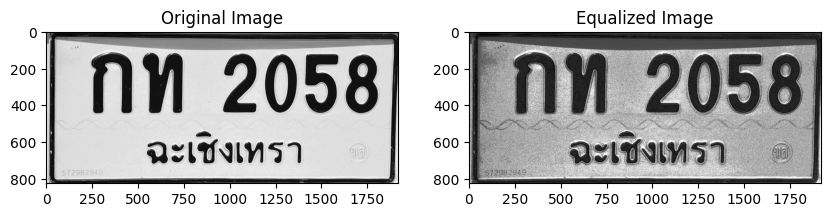

In [6]:
# Load image in grayscale
img_16_gray = cv2.imread('License_plate_16_gray_levels.jpg', 0)

# Perform histogram equalization
equalized_img = cv2.equalizeHist(img_16_gray)

# Display original and equalized image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(img_16_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized Image')
plt.show()

### Histogram Matching

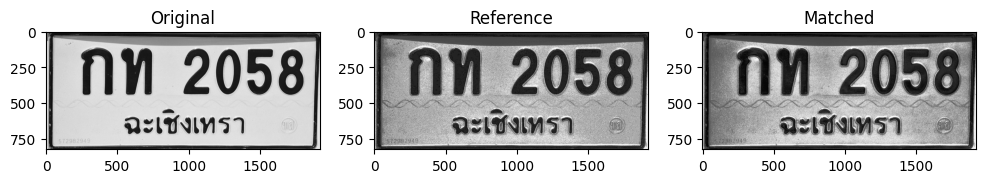

In [7]:
# reference_img = cv2.imread('License_plate_16_gray_levels.jpg', cv2.IMREAD_GRAYSCALE)
reference_img = equalized_img

# Perform histogram matching
matched_img = exposure.match_histograms(img_gray, reference_img, channel_axis=None)

# Display the result
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(reference_img, cmap='gray'), plt.title('Reference')
plt.subplot(1, 3, 3), plt.imshow(matched_img, cmap='gray'), plt.title('Matched')
plt.show()

### Adjust Brightness and Contrast

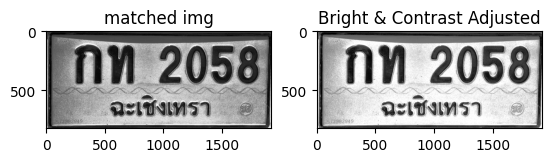

In [8]:
def adjust_brightness_contrast(matched_img, brightness=0, contrast=0):
    # Formula: new_img = img * contrast + brightness
    return cv2.convertScaleAbs(matched_img, alpha=contrast, beta=brightness)

# Adjust brightness and contrast
bright_img = adjust_brightness_contrast(matched_img, brightness=50, contrast=1.2)

# Display the result
plt.subplot(1, 2, 1), plt.imshow(matched_img, cmap='gray'), plt.title('matched img')
plt.subplot(1, 2, 2), plt.imshow(bright_img, cmap='gray'), plt.title('Bright & Contrast Adjusted')
plt.show()

## 2. Spatial Filtering

### Mean Filter

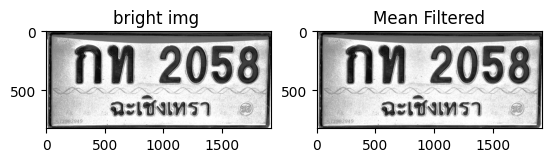

In [9]:
# Apply a mean filter (using a 3x3 kernel)
mean_filtered = cv2.blur(bright_img , (3, 3))

# Display
plt.subplot(1, 2, 1), plt.imshow(bright_img, cmap='gray'), plt.title('bright img ')
plt.subplot(1, 2, 2), plt.imshow(mean_filtered, cmap='gray'), plt.title('Mean Filtered')
plt.show()

### Median Filter

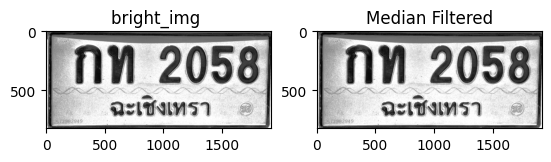

In [10]:
# Apply a median filter
median_filtered = cv2.medianBlur(mean_filtered , 3)

# Display
plt.subplot(1, 2, 1), plt.imshow(mean_filtered , cmap='gray'), plt.title('bright_img ')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()
io.imsave('Median_And_mean_Filtered.jpg', median_filtered)

### Laplacian Filter

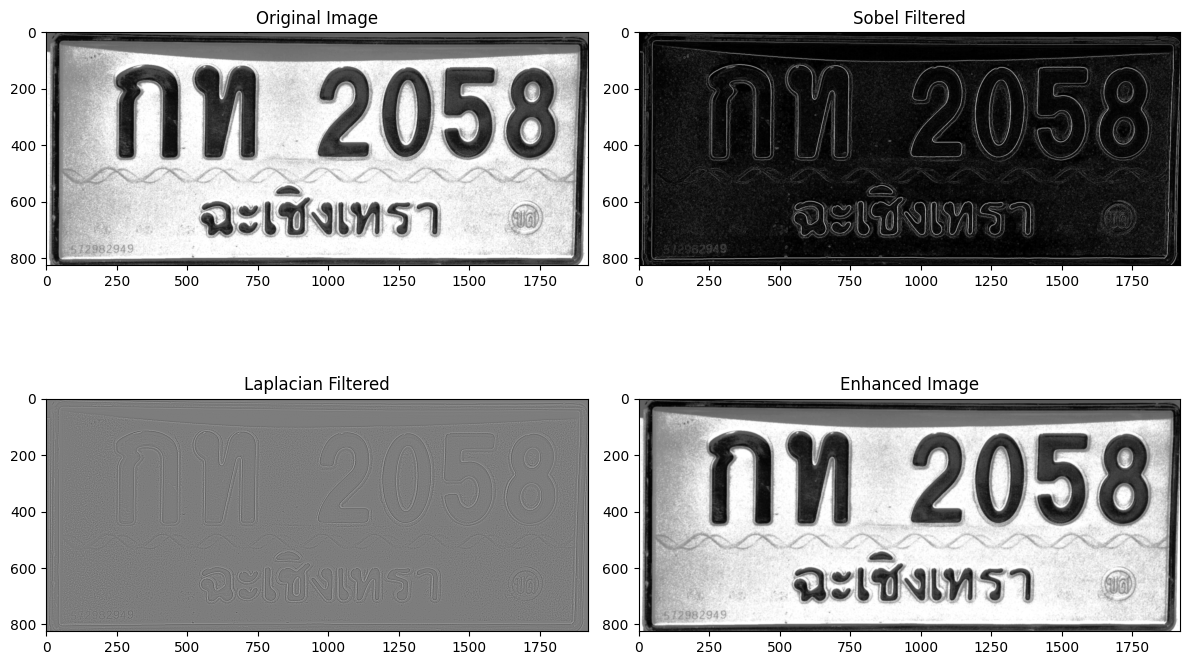

In [11]:
# Load the image
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original Image')

# Sobel filtering
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_v = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
tmp1 = convolve(img_gray, sobel_h)
tmp2 = convolve(img_gray, sobel_v)
sobel_filtered = np.sqrt(tmp1**2 + tmp2**2)
axs[0, 1].imshow(sobel_filtered, cmap='gray')
axs[0, 1].set_title('Sobel Filtered')

# Laplacian filtering
laplacian_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplacian_filtered = convolve(img_gray, laplacian_mask)
axs[1, 0].imshow(laplacian_filtered, cmap='gray')
axs[1, 0].set_title('Laplacian Filtered')

# Image enhancement
enhanced_img = img_gray - 0.1 * laplacian_filtered
enhanced_img = np.clip(enhanced_img, 0, 1)
axs[1, 1].imshow(enhanced_img, cmap='gray')
axs[1, 1].set_title('Enhanced Image')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

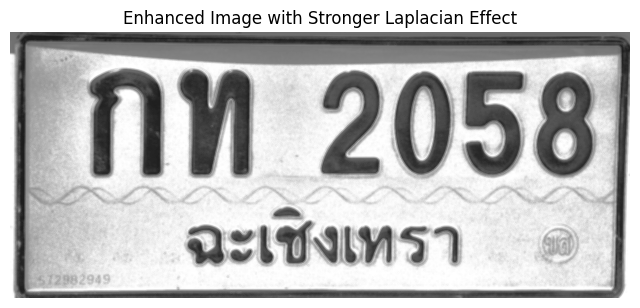

In [12]:
# Load the uploaded image (already grayscale)
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)  # Directly use the image as grayscale

# Laplacian filtering with stronger contrast enhancement
laplacian_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
laplacian_filtered = convolve(img_gray, laplacian_mask)

# Enhance the image by increasing the effect of the Laplacian filter
enhanced_img = img_gray - 0.5 * laplacian_filtered  # Increased weight from 0.1 to 0.5
enhanced_img = np.clip(enhanced_img, 0, 1)

# Display the results
plt.figure(figsize=(8, 6))
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image with Stronger Laplacian Effect')
plt.axis('off')
plt.show()

### High-Pass Filter

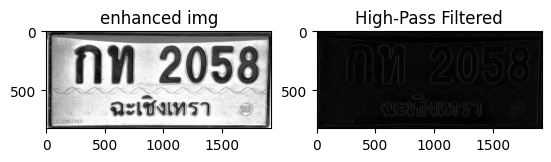

In [13]:
# Apply a high-pass filter using a kernel
high_pass_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
high_pass_filtered = cv2.filter2D(img, -1, high_pass_kernel)

# Display the result
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('enhanced img')
plt.subplot(1, 2, 2), plt.imshow(high_pass_filtered, cmap='gray'), plt.title('High-Pass Filtered')
plt.show()

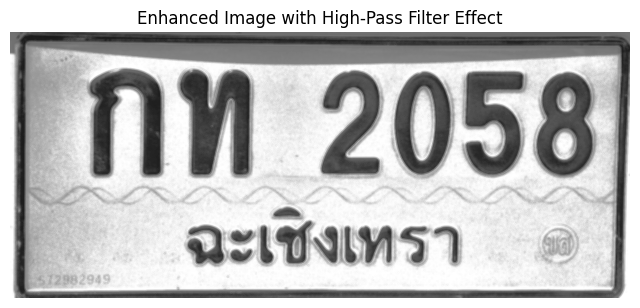

In [14]:
# Load the uploaded image (already grayscale)
img = io.imread('Median_And_mean_Filtered.jpg')
img_gray = img_as_float(img)  # Directly use the image as grayscale

# High-pass filtering
high_pass_mask = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
high_pass_filtered = convolve(img_gray, high_pass_mask)

# Enhance the image by increasing the effect of the high-pass filter
enhanced_img = img_gray - 0.5 * high_pass_filtered  # Adjust the weight for enhancement
enhanced_img = np.clip(enhanced_img, 0, 1)

# Display the results
plt.figure(figsize=(8, 6))
plt.imshow(enhanced_img, cmap='gray')
plt.title('Enhanced Image with High-Pass Filter Effect')
plt.axis('off')
plt.show()

## 3. Frequency Domain Filtering

### Fourier Transform and Filtering

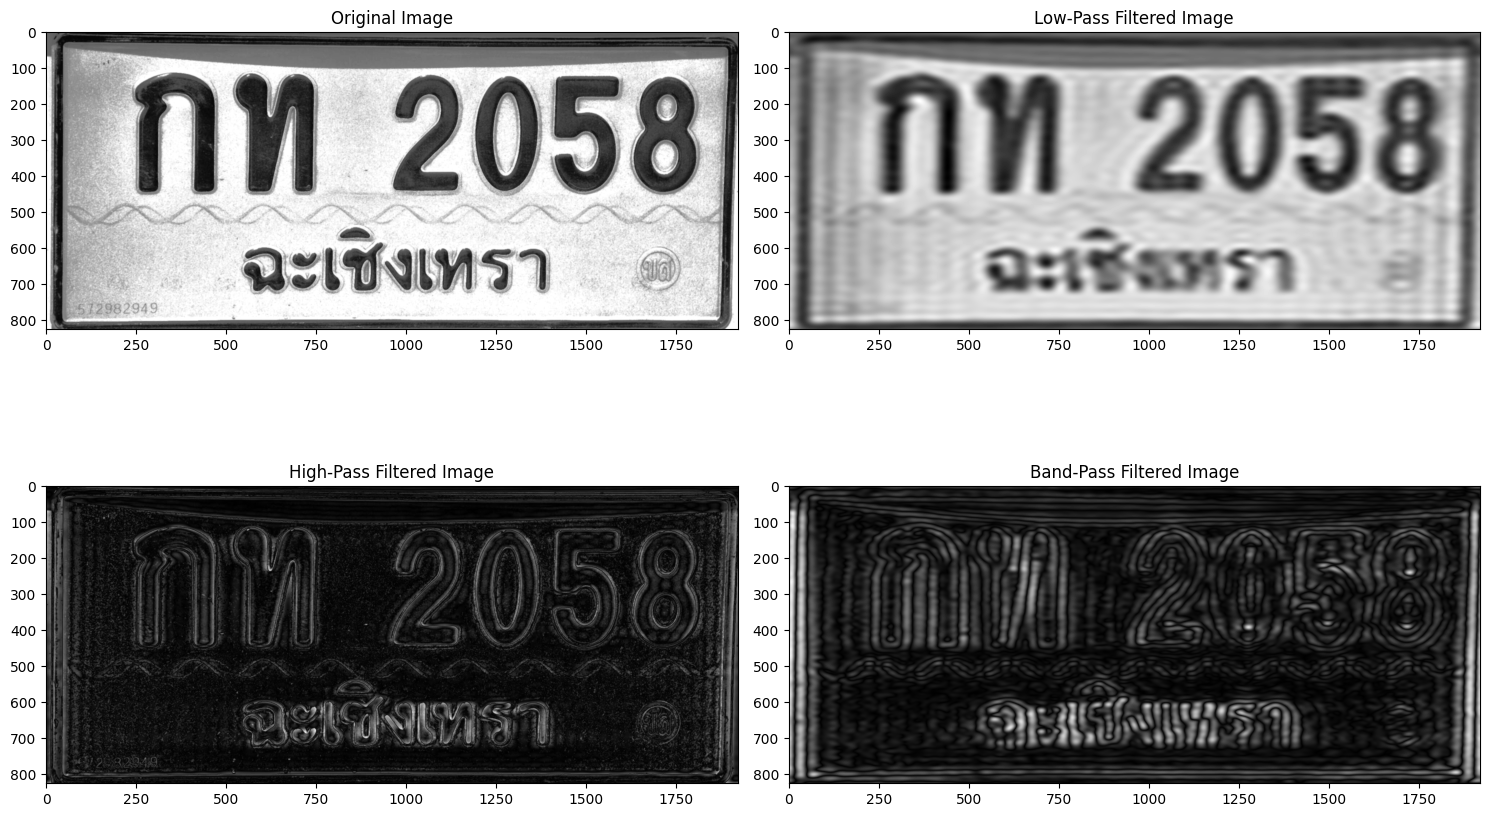

In [15]:
# Load the image
img = io.imread('Median_And_mean_Filtered.jpg')

# Convert to grayscale if the image has more than 2 dimensions (i.e., it's an RGB image)
if len(img.shape) > 2:
    img_gray = color.rgb2gray(img)
else:
    img_gray = img_as_float(img)

# Get the size of the image
rows, cols = img_gray.shape

# Perform Fourier transform of the image
f_transform = fftshift(fft2(img_gray))

# Function to create different filter masks
def create_filter(rows, cols, pass_type='low', radius_inner=20, radius_outer=50):
    mask = np.zeros((rows, cols), np.uint8)
    crow, ccol = rows // 2, cols // 2

    if pass_type == 'low':
        # Create a circular low-pass mask
        mask[crow-radius_outer:crow+radius_outer, ccol-radius_outer:ccol+radius_outer] = 1
    elif pass_type == 'high':
        # Create a circular high-pass mask (inverse of low-pass)
        mask = np.ones((rows, cols), np.uint8)
        mask[crow-radius_inner:crow+radius_inner, ccol-radius_inner:ccol+radius_inner] = 0
    elif pass_type == 'band':
        # Create a band-pass mask
        outer_circle = np.zeros((rows, cols), np.uint8)
        inner_circle = np.ones((rows, cols), np.uint8)
        outer_circle[crow-radius_outer:crow+radius_outer, ccol-radius_outer:ccol+radius_outer] = 1
        inner_circle[crow-radius_inner:crow+radius_inner, ccol-radius_inner:ccol+radius_inner] = 0
        mask = outer_circle * inner_circle  # Band-pass = Outer circle - Inner circle

    return mask

# Create masks for low-pass, high-pass, and band-pass filtering
low_pass_mask = create_filter(rows, cols, pass_type='low', radius_outer=30)
high_pass_mask = create_filter(rows, cols, pass_type='high', radius_inner=30)
band_pass_mask = create_filter(rows, cols, pass_type='band', radius_inner=20, radius_outer=50)

# Apply the masks by multiplying them with the Fourier transformed image
low_pass_filtered = f_transform * low_pass_mask
high_pass_filtered = f_transform * high_pass_mask
band_pass_filtered = f_transform * band_pass_mask

# Perform inverse Fourier transform to get the filtered images
low_pass_img = np.abs(ifft2(ifftshift(low_pass_filtered)))
high_pass_img = np.abs(ifft2(ifftshift(high_pass_filtered)))
band_pass_img = np.abs(ifft2(ifftshift(band_pass_filtered)))

# Display the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Low-Pass Filtered Image
plt.subplot(2, 2, 2)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low-Pass Filtered Image')

# High-Pass Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High-Pass Filtered Image')

# Band-Pass Filtered Image
plt.subplot(2, 2, 4)
plt.imshow(band_pass_img, cmap='gray')
plt.title('Band-Pass Filtered Image')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + Low-Pass Filtered)

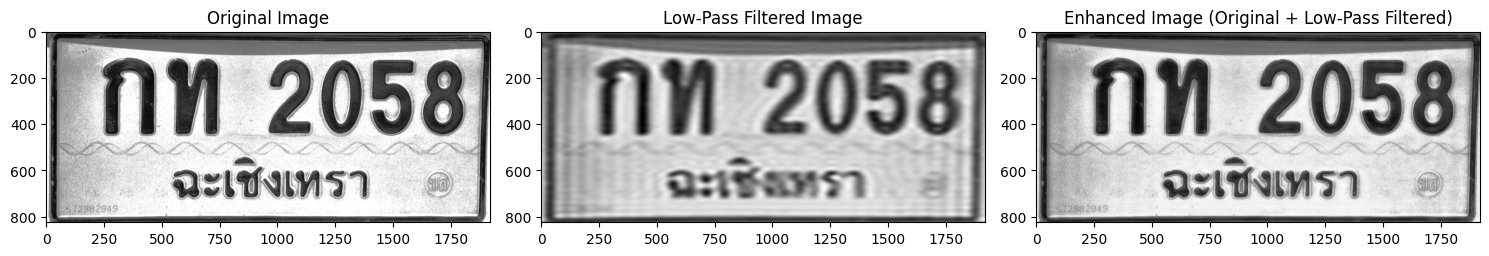

In [16]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
low_pass_enhanced_img = alpha * img_gray + (1 - alpha) * low_pass_img

# Display the original, low-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Low-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low-Pass Filtered Image')

# Enhanced Image (Original + Low-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(low_pass_enhanced_img , cmap='gray')
plt.title('Enhanced Image (Original + Low-Pass Filtered)')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + High-Pass Filtered)

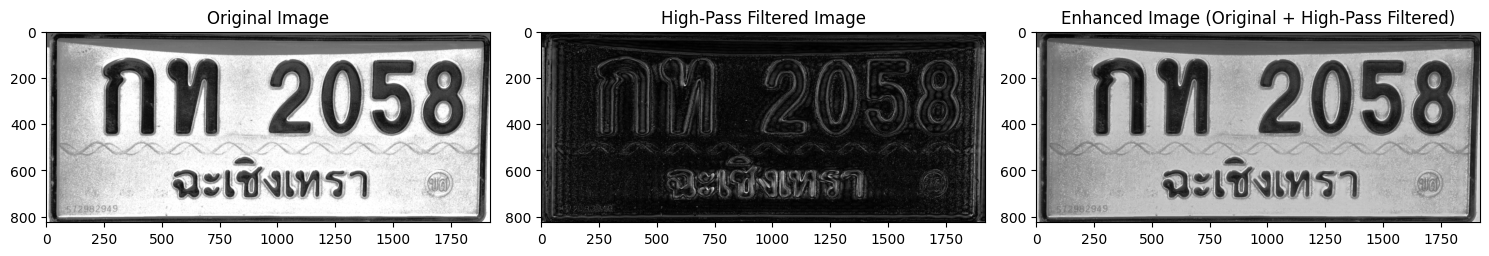

In [17]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
high_pass_enhanced_img = alpha * img_gray + (1 - alpha) * high_pass_img

# Display the original, high-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# High-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High-Pass Filtered Image')

# Enhanced Image (Original + High-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(high_pass_enhanced_img, cmap='gray')
plt.title('Enhanced Image (Original + High-Pass Filtered)')

plt.tight_layout()
plt.show()

### Enhanced Image (Original + Band-Pass Filtered)

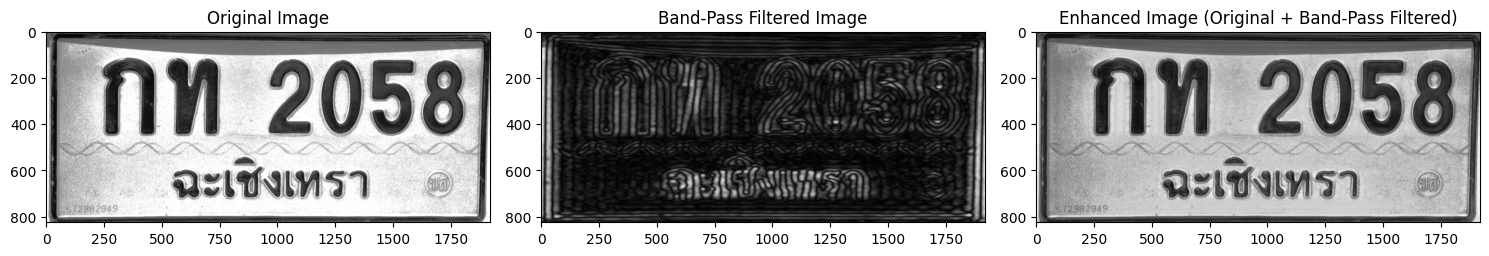

In [18]:
alpha = 0.7  # Blend factor, adjust this to control the level of enhancement
band_pass_enhanced_img = alpha * img_gray + (1 - alpha) * band_pass_img

# Display the original, band-pass filtered, and enhanced images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

# Band-Pass Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(band_pass_img, cmap='gray')
plt.title('Band-Pass Filtered Image')

# Enhanced Image (Original + Band-pass Filtered)
plt.subplot(1, 3, 3)
plt.imshow(band_pass_enhanced_img, cmap='gray')
plt.title('Enhanced Image (Original + Band-Pass Filtered)')

plt.tight_layout()
plt.show()